<a href="https://colab.research.google.com/github/mohd-faizy/07P_Exploratory_Data_Analysis_With_Seaborn/blob/master/04_Tumor_Diagnosis_RandomForest_Part_4_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Tumor Diagnosis: Part-4 Machine Learning & Data Preprocessing using Random Forest Classifier(RFC)__

In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_data_A.csv to breast_cancer_data_A.csv


##  __Importing all neccessary packages for data analysis and visualization__

In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)

# for providing path
import os
print(os.listdir('/content'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['.config', 'breast_cancer_data_A.csv', 'sample_data']


**Importing the dataset**

In [3]:
# Loading the Dataset and Listing the Features/Attributes 
data = pd.read_csv('/content/breast_cancer_data_A.csv')

display(data.head()) #Show the first 5 rows of the dataset

# Print number of data points
print("Number of Data Points: {}".format(data.shape[0])) 
# Print number of features
print("Number of Features/Attributes: {}".format(data.shape[1]))
# Print the list of all features in the dataset 
print("Features/Attributes:", data.columns)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Number of Data Points: 569
Number of Features/Attributes: 33
Features/Attributes: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
# Removing the last column as it is empty
data = data.drop(['id', 'Unnamed: 32'], axis = 1)

display(data.head()) #Show the first 5 rows of the dataset

# Print number of data points
print("Number of Data Points: {}".format(data.shape[0])) 
# Print number of features
print("Number of Features/Attributes: {}".format(data.shape[1]))
# Print the list of all features in the dataset 
print("Features/Attributes:", data.columns)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Data Points: 569
Number of Features/Attributes: 31
Features/Attributes: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# checking if there is any null values in the data
data.isnull().sum().sum()

0

# __1. Data Visualization__


---



In [7]:
labels = data['diagnosis'] #Lables column from complete_data
class_distribution = labels.value_counts() #distribution between malignant and benign tumors 
print (class_distribution)

B    357
M    212
Name: diagnosis, dtype: int64


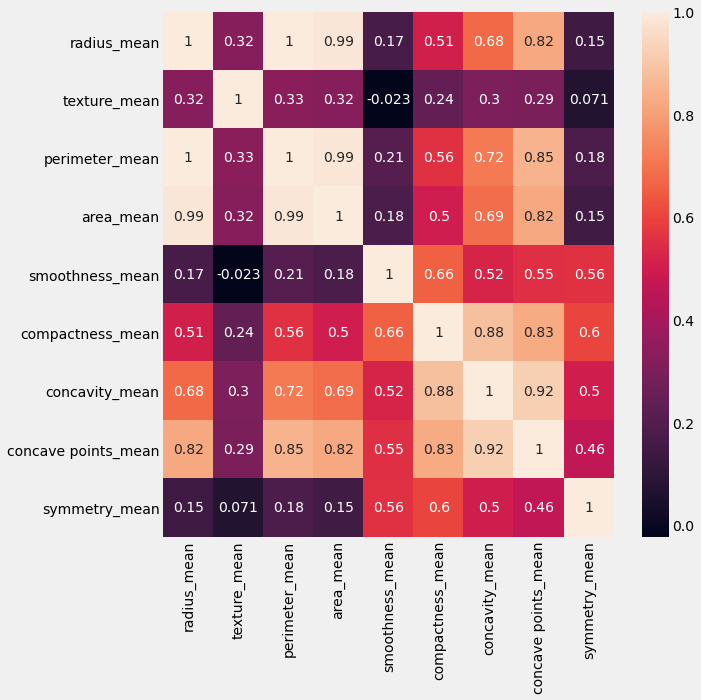

In [8]:
"""
Plot Correlation Heatmap for data to observe the nature and extent correlation between various features in the dataset 
"""
plt.figure(figsize=(9,9)) 
sns.heatmap(data.iloc[:,:10].corr(), cbar=True, yticklabels=True, annot=True)

B    357
M    212
Name: diagnosis, dtype: int64


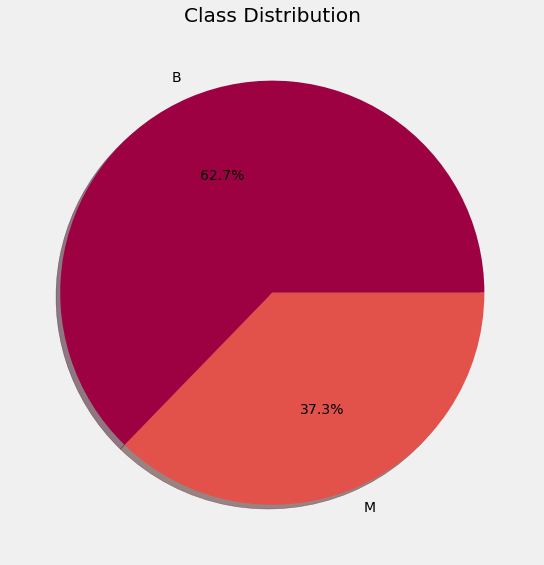

In [9]:
from matplotlib.gridspec import GridSpec

# checking the different values contained in the diagnosis column
diagnosis = data['diagnosis'].value_counts()
print(diagnosis)

diagnosis_size = diagnosis.values
diagnosis_label = diagnosis.index

plt.figure(1, figsize=(20,20)) 
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Class Distribution')
type_show_ids = plt.pie(diagnosis_size,
                        labels=diagnosis.index,
                        autopct='%1.1f%%',
                        shadow=True,
                        colors=colors)
plt.show()

Here, B referes to benign which means the cells are safe from cancer
whereas M refers to Malign which means the cell is very much dangerous and venomous can lead to breast cancer

We have to train the data in such a way that it can predict the status of the cells
that whether they are M(malign) or B(Benign).

B    357
M    212
Name: diagnosis, dtype: int64


Text(0.5, 0.98, 'Class distribution - Malignent - M / Benign - B ')

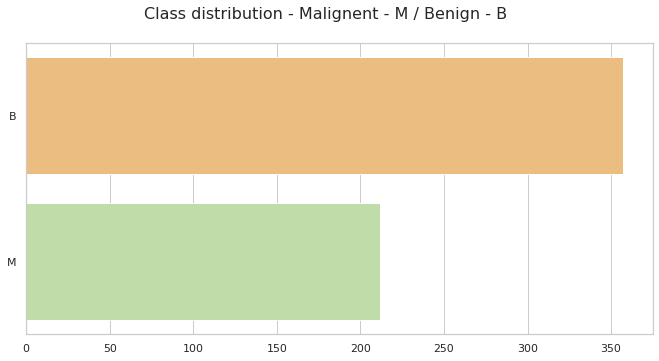

In [10]:
diagnosis = data['diagnosis'].value_counts()
print(diagnosis)

sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

diagnosis_size = diagnosis.values
diagnosis_label = diagnosis.index

plt.figure(2, figsize=(10,5))
the_grid = GridSpec(2, 2)

sns.barplot(diagnosis_size, diagnosis_label, data=data, palette='Spectral')
plt.suptitle('Class distribution - Malignent - M / Benign - B ', fontsize=16)

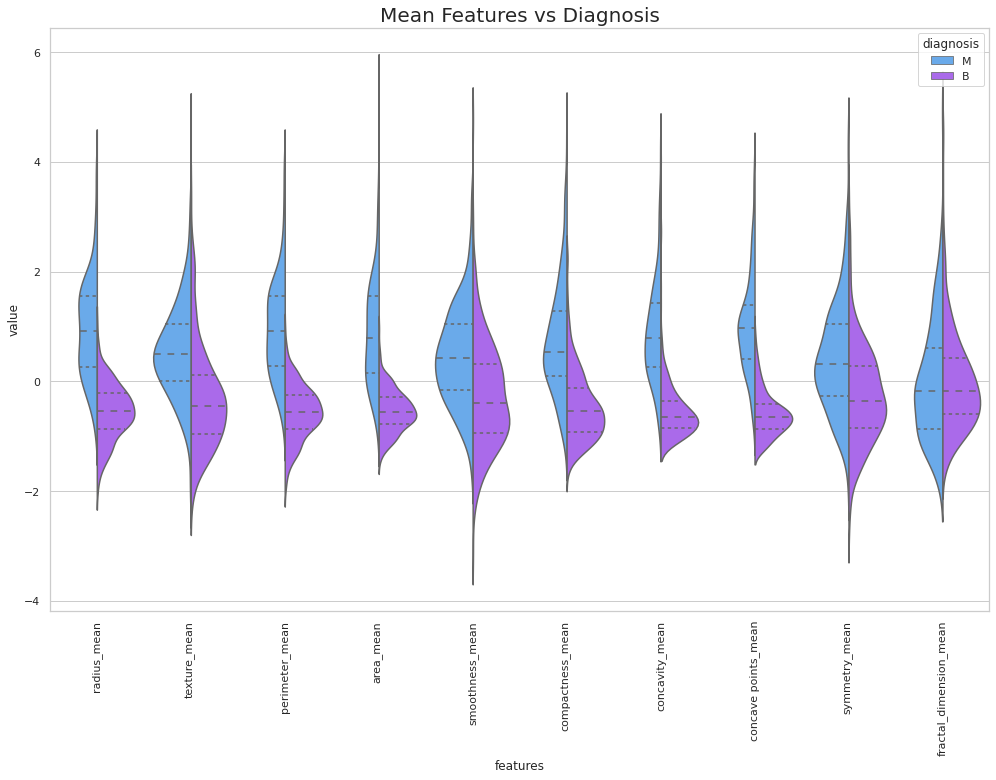

In [11]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,0:10]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(15, 10))

sns.violinplot(x="features",
               y="value",
               hue="diagnosis",
               data=df,
               split=True,
               inner="quart",
               palette = 'cool')

plt.title('Mean Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

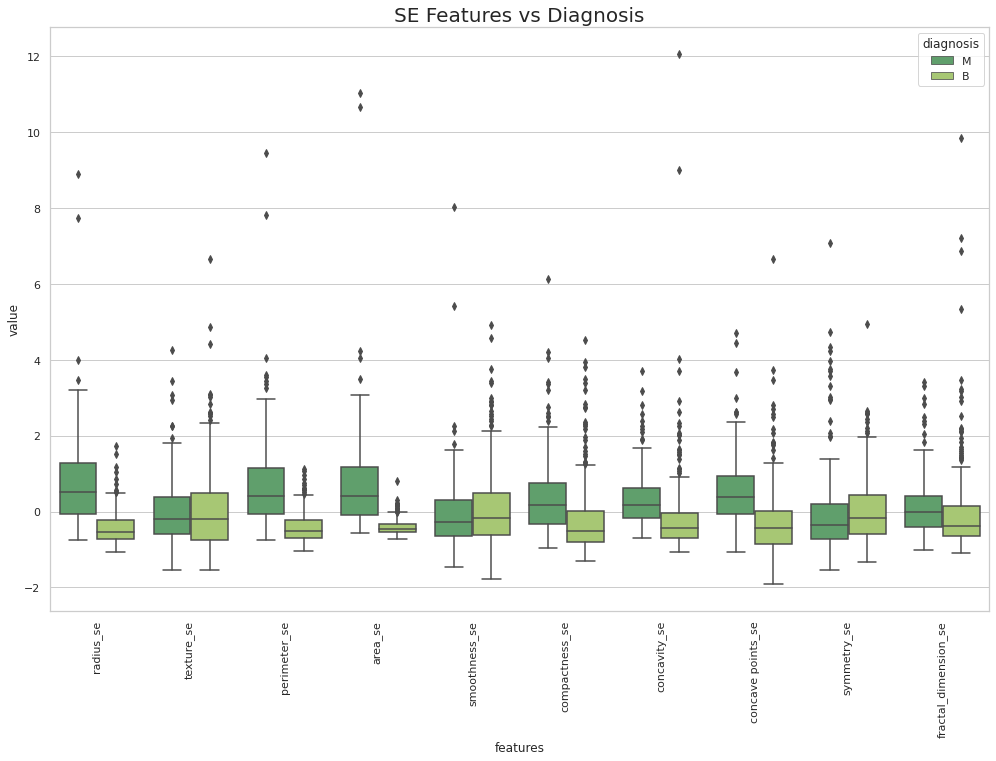

In [12]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,10:20]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'summer')
plt.title('SE Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

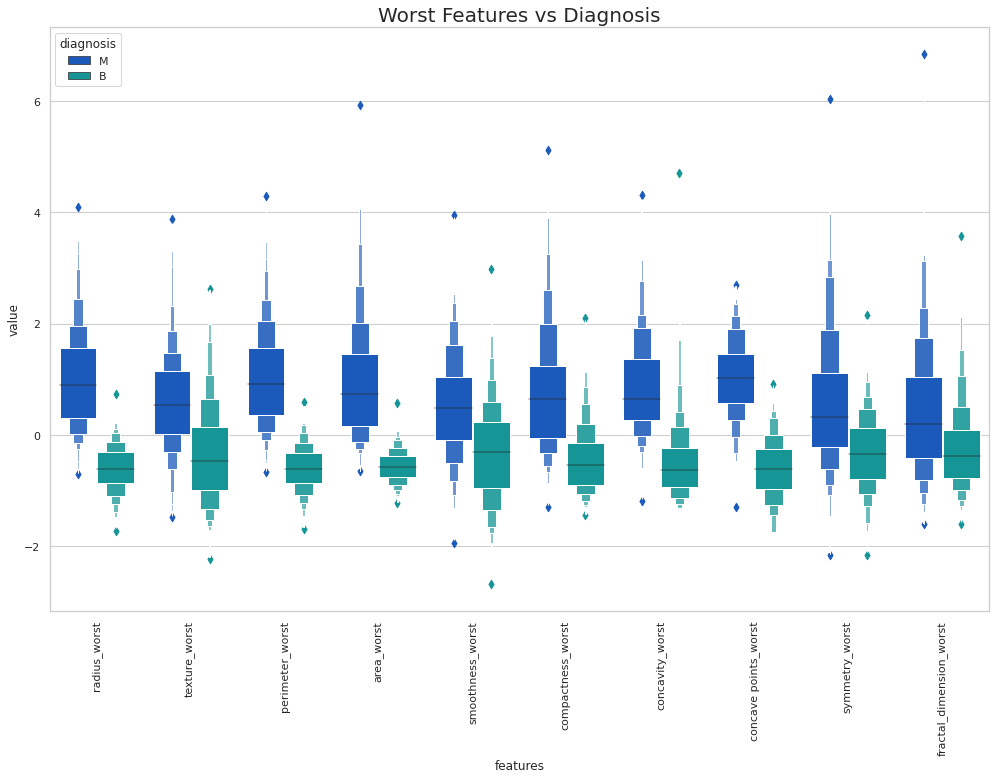

In [13]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,20:30]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxenplot(x="features", y="value", hue="diagnosis", data=df, palette = 'winter')
plt.title('Worst Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

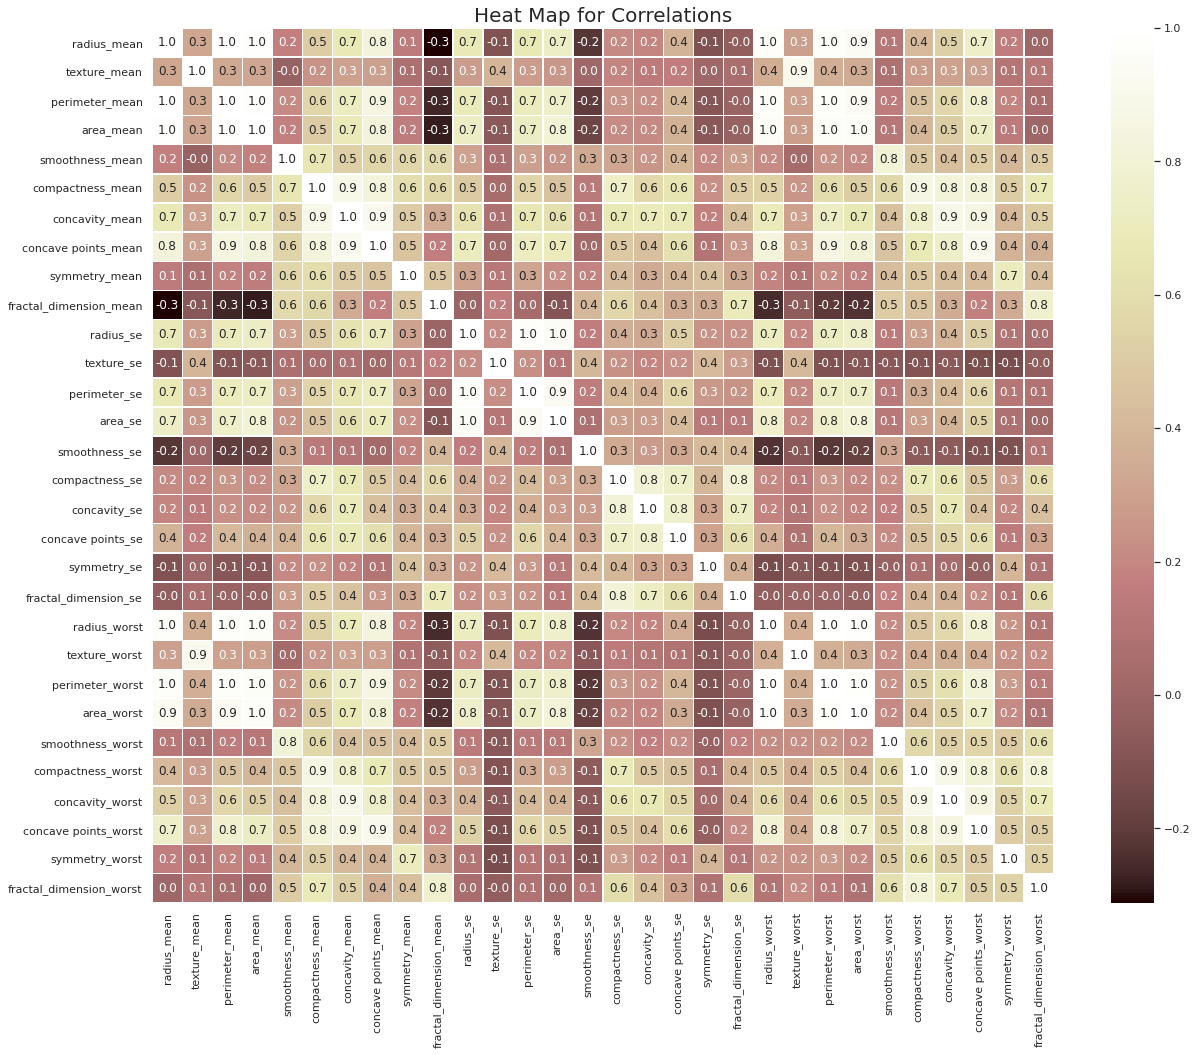

In [14]:
plt.rcParams['figure.figsize'] = (18, 15)

sns.heatmap(data.corr(), cmap = 'pink',
            annot = True, linewidths = 0.5,
            fmt = '.1f')

plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

From the above correlation plot we can easily figure out that items which are very much related to each other and the items which are less related to each other

It tells us the degree of relativity amongst all the data items present on the dataset

For Example,
fractal_dimension_mean and smoothness mean are highly related 
whereas texture_se and fractal-dimension_mean are very less related to each other.

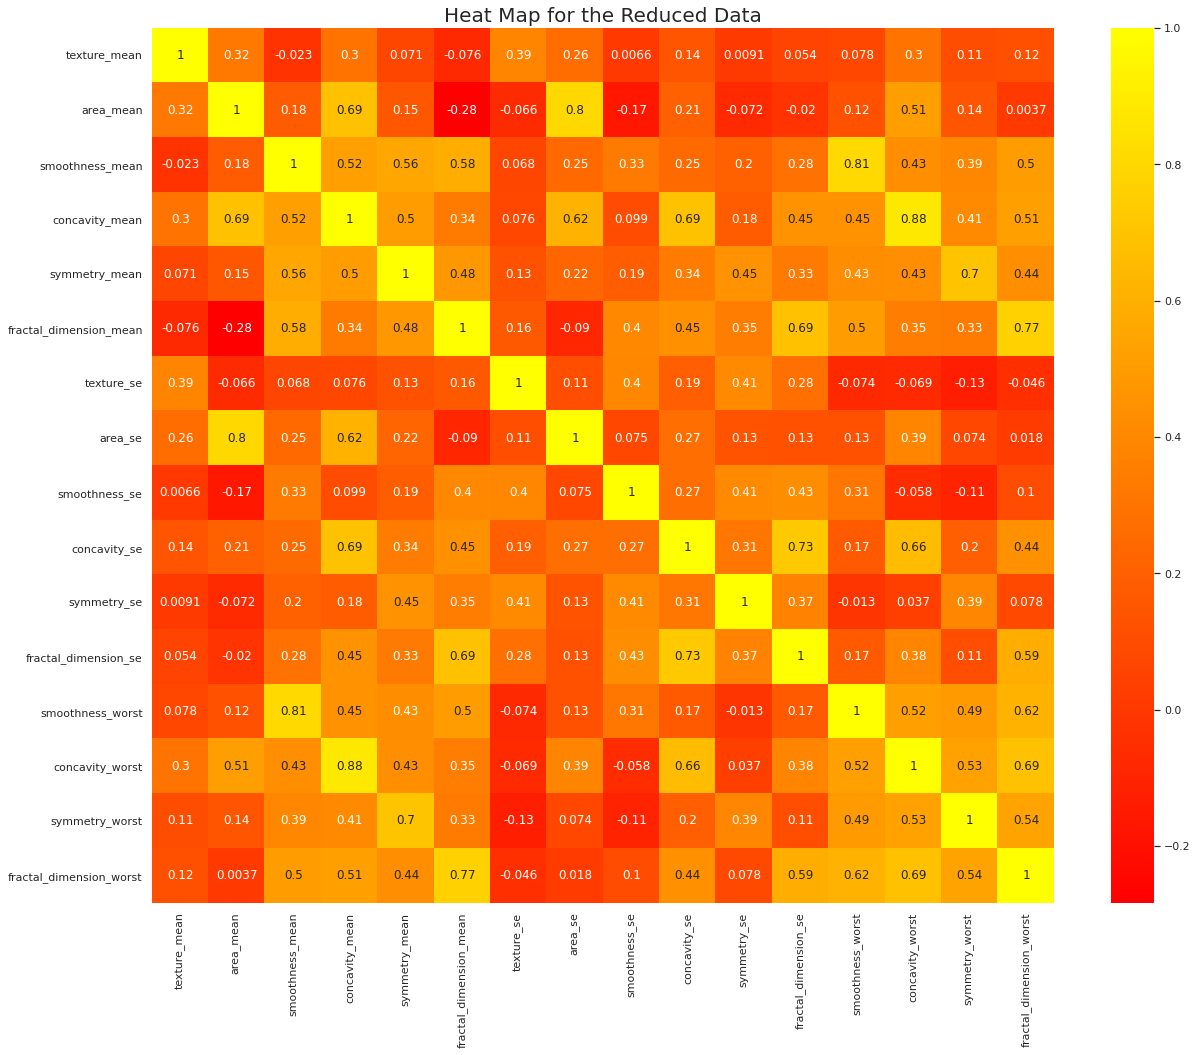

In [15]:
list_to_delete = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
                  'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
                  'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x = x.drop(list_to_delete, axis = 1)

plt.rcParams['figure.figsize'] = (18, 15)
sns.heatmap(x.corr(), annot = True, cmap = 'autumn')
plt.title('Heat Map for the Reduced Data', fontsize = 20)
plt.show()

### __Data preprocessing__

In [16]:
# label encoding of the dependent variable
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
y= le.fit_transform(y)

In [17]:
#splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 16)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (455, 16)
Shape of y_train : (455,)
Shape of x_test : (114, 16)
Shape of y_test : (114,)


# __2. Modelling__


---



**Random Forest**

Training accuracy : 1.0
Testing accuarcy : 0.9912280701754386
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        73
           1       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



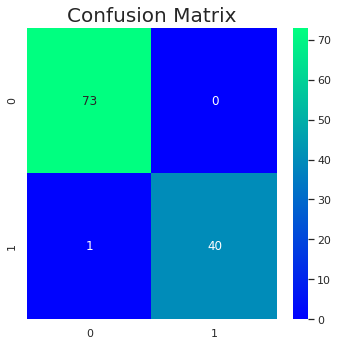

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

# __3. Using RFECV__


---



__RFE__ is a method to choose the best set of features in data when used along with a __linear model__, such as __Ridge__ or __tree-based__ models such as __RandomForests__ etc. It works in the following way.

We initially start with all the features. For every step or iteration the worst x number of features (i.e the features which have the lowest feature importances in case of tree-based models and and the features which have the lowest absolute value in case of linear models) are eliminated using the "step" parameter till "n_features" are left. If you notice, you need to provide the n_features parameter in the constructor.

The __RFECV__ object helps to tune or find this __n_features parameter__ using __cross-validation__. For every step where "step" number of features are eliminated, it calculates the score on the validation data. The number of features left at the step which gives the maximum score on the __validation data__, is considered to be __"the best n_features"__ of your data.

In [19]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = RandomForestClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 10
Best features : Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Training Accuracy : 1.0
Testing Accuracy : 0.9824561403508771


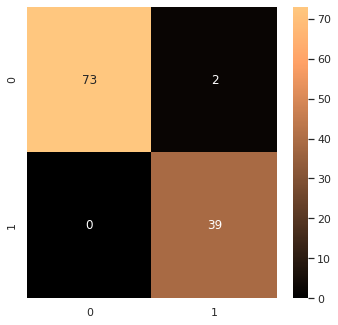

In [20]:
y_pred = rfecv.predict(x_test)

print("Training Accuracy :", rfecv.score(x_train, y_train))
print("Testing Accuracy :", rfecv.score(x_test, y_test))

cm = confusion_matrix(y_pred, y_test)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()